In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#collecting data


In [3]:
df = pd.read_csv("mcdonalds.csv")
df.head(10)
     


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,1,32,Every three months,Female


# Exploring Data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df_taste = df.iloc[:,:-4]
df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [6]:
for feature in df_taste.columns:
    df_taste[feature] = np.where(df_taste[feature] == 'Yes',1,0)
    df[feature] = np.where(df[feature] == 'Yes',1,0)

df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [7]:
df_taste.mean().round(2)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

# Principal Componants Analysis

In [8]:
pca = PCA(n_components=11).fit(np.array(df_taste))
transformed_df = pca.transform(df_taste)
df_PCA = pd.DataFrame(transformed_df, columns=df_taste.columns)
df_PCA
     


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [9]:
sd_arr = df_PCA.describe().loc['std']
temp_frame = pd.DataFrame({'std':sd_arr})
sd = temp_frame['std']
temp_frame['variance'] = [(std_dev**2)/sum(np.square(sd)) for std_dev in sd]
temp_frame['Cumulative_Proportion'] = np.cumsum(temp_frame['variance'])
temp_frame.head()
     

,std,variance,Cumulative_Proportion
yummy,0.757050,0.299447,0.299447
convenient,0.607456,0.192797,0.492244
spicy,0.504619,0.133045,0.625290
fattening,0.398799,0.083096,0.708386
greasy,0.337405,0.059481,0.767866


In [10]:
pca_df = pd.DataFrame(pca.components_.round(3),columns=df_taste.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-0.477,-0.155,-0.006,0.116,0.304,-0.108,-0.337,-0.472,0.329,-0.214,0.375
1,0.364,0.016,0.019,-0.034,-0.064,-0.087,-0.611,0.307,0.601,0.077,-0.140
2,-0.304,-0.063,-0.037,-0.322,-0.802,-0.065,-0.149,-0.287,0.024,0.192,-0.089
3,0.055,-0.142,0.198,-0.354,0.254,-0.097,0.119,-0.003,0.068,0.763,0.370
4,-0.308,0.278,0.071,-0.073,0.361,0.108,-0.129,-0.211,-0.003,0.288,-0.729


In [11]:
X = []
for feature in pca_df.columns:
    X.append(np.array(pca_df[feature]).reshape(1,-1))

col = list(pca_df.columns)
df_PC = pd.DataFrame()

for i in range(0,11):
    df_PC = df_PC.append(pd.DataFrame(X[i],columns=['PC{}'.format(i) for i in range(1,12)]),ignore_index=True)

df_PC[''] = pd.Series(col)
df_PC.set_index(keys='',inplace=True)
df_PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
,,,,,,,,,,,
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490


# Plotting

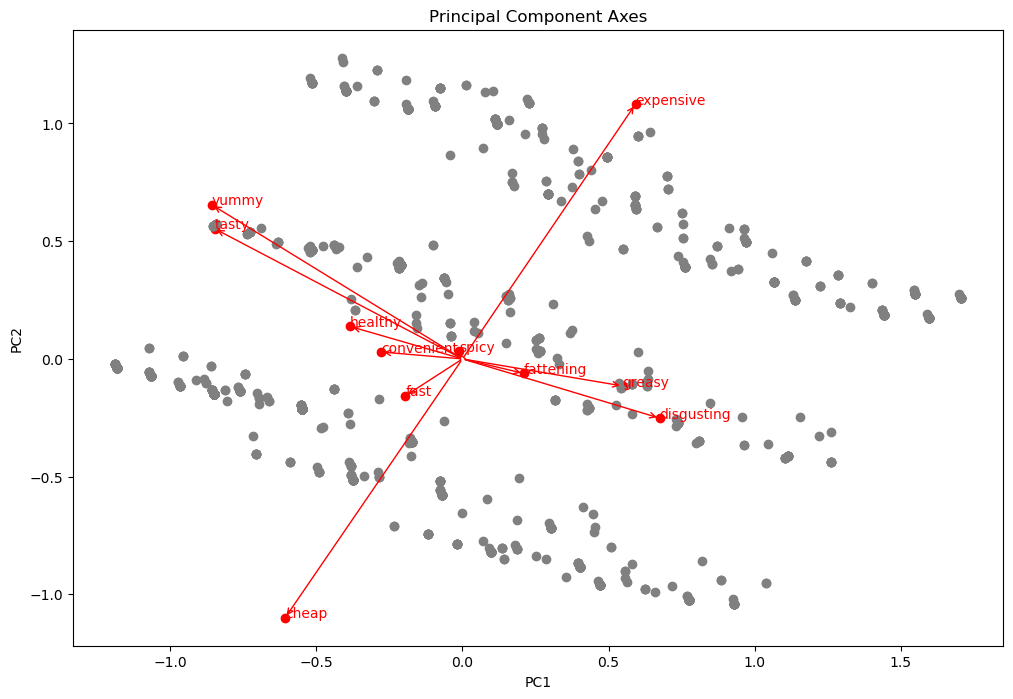

In [12]:

scale = 1.8
plt.figure(figsize=(12,8))
for i,j in enumerate(df_PC.index):
    plt.text(pca.components_[0, :][i]*scale, (pca.components_[1, :][i])*scale, j, color='red')
    plt.annotate('', xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale, color='red')
plt.scatter(data=df_PCA, x='yummy', y='convenient',color='grey');
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')

plt.show()


# Extracting Segments

In [13]:
df_taste

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [14]:
df_taste

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


# Using K-Means Algorithm

Text(0, 0.5, 'Sum of Within Cluster Distances')

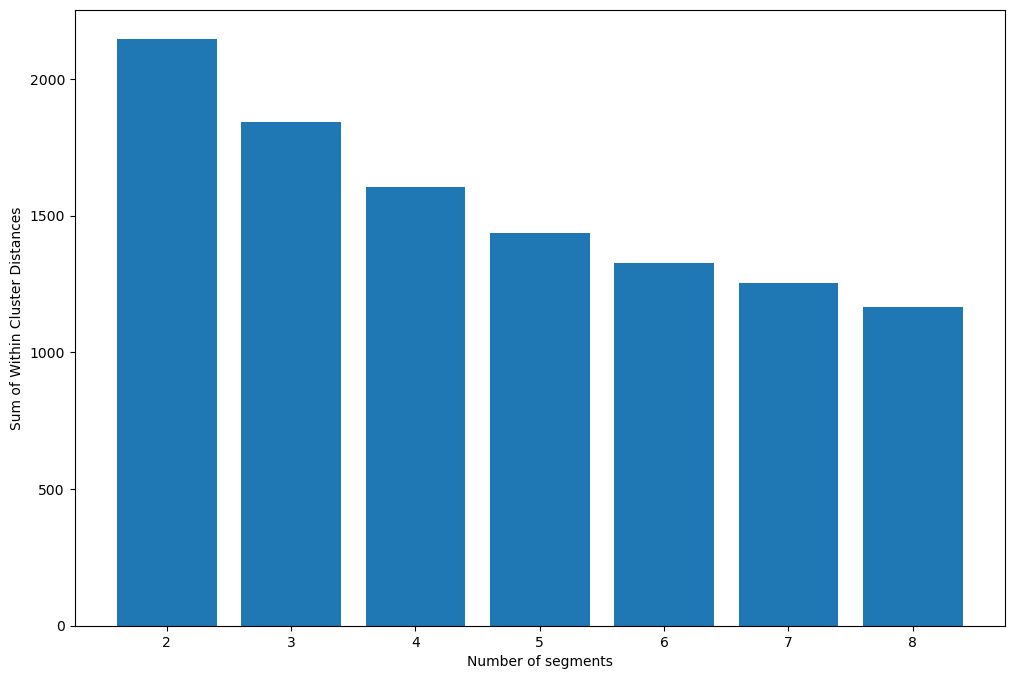

In [15]:
import numpy as np
# Convert list to NumPy array
k_range = range(2, 9)
inertias = []
k_result = []
#df_taste = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(df_taste)
    labels = model.predict(df_taste)
    inertias.append(model.inertia_)
    k_result.append(labels)

plt.figure(figsize=(12,8))
plt.bar(range(2, 9), inertias)
plt.xlabel('Number of segments')
plt.ylabel('Sum of Within Cluster Distances')

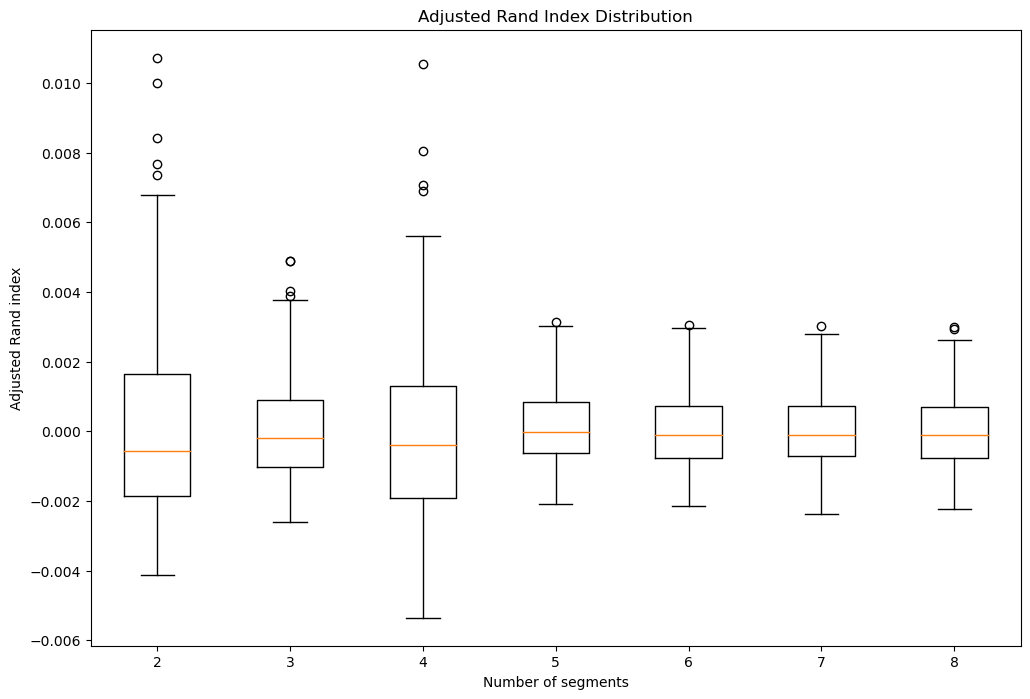

In [16]:
n_boot = 100*2
plt.figure(figsize = (12,8))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)

plt.boxplot(ari_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

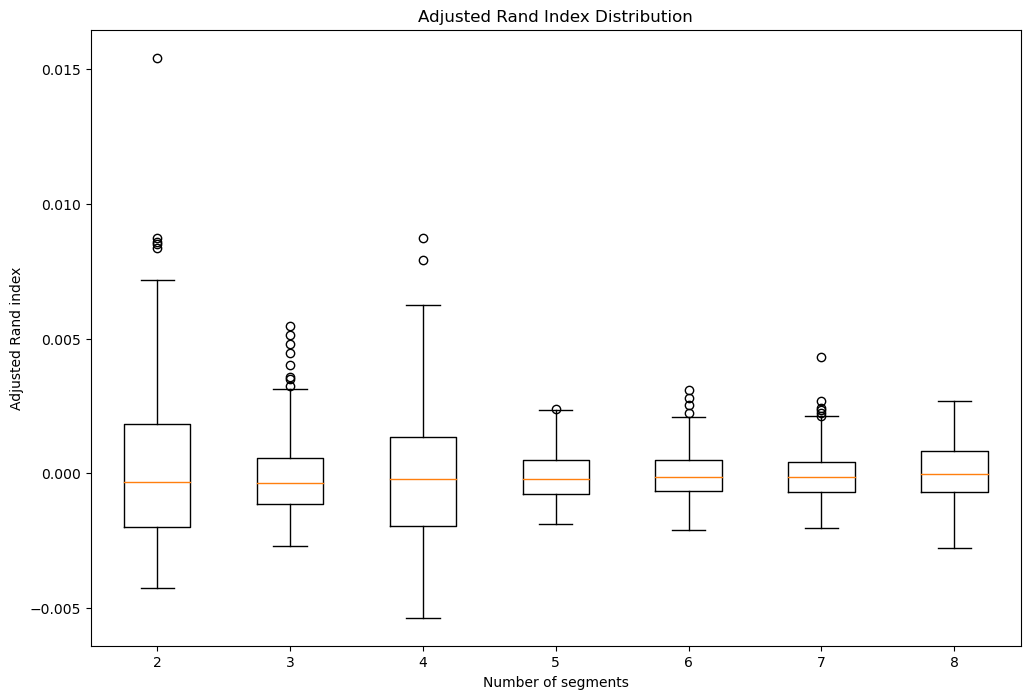

In [17]:
import numpy as np
from sklearn.metrics import adjusted_rand_score

n_boot = 100*2

plt.figure(figsize = (12,8))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)
plt.boxplot(ari_scores, labels=range(2, 2+len(ari_scores)))

plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()
     


In [18]:
#segment creation
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_taste)
label4 = model.predict(df_taste)

In [19]:
#Using Mixture of Distribution


In [20]:
# using mixture of distribution
from sklearn.mixture import GaussianMixture

score,aic,bic = [],[],[]

models = []
from sklearn.mixture import GaussianMixture

models = []
for k in range(2, 6):  # Reduce the range to avoid ValueError
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(df_taste)
    models.append(model)


    score.append(model.score(df_taste))
    aic.append(model.aic(df_taste))
    bic.append(model.bic(df_taste))

for i in range(len(k_range)):
    if not i<len(score):
        score.append(0)

for i in range(len(k_range)):
    if not i<len(aic):
        aic.append(0)
        
for i in range(len(k_range)):
    if not i<len(bic):
        bic.append(0)


table = pd.DataFrame({
    'k': k_range,
    'LogLik': score,
    'AIC': aic,
    'BIC': bic
})

table
     

,k,LogLik,AIC,BIC
0,2,5.211510,-14834.648124,-14016.033346
1,3,9.495882,-27129.034055,-25898.471196
2,4,10.652146,-30333.135735,-28690.624793
3,5,16.579823,-47402.964618,-45348.505595
4,6,0.000000,0.000000,0.000000
5,7,0.000000,0.000000,0.000000
6,8,0.000000,0.000000,0.000000


In [21]:
len(k_range) , len(score) , len(aic)  

(7, 7, 7)

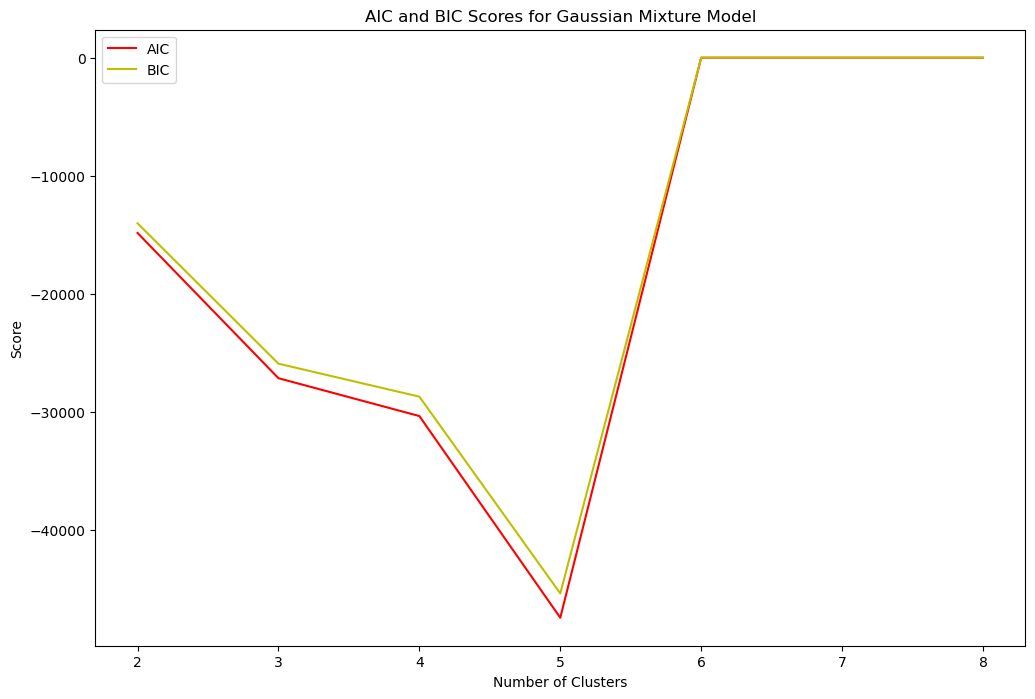

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, aic, label='AIC',color='r')
plt.plot(k_range, bic, label='BIC',color='y')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()
     

In [23]:

from sklearn.metrics import confusion_matrix

# First Gaussian Mixture Model
g_mixture = GaussianMixture(n_components=4, n_init=10, random_state=0)
g_mixture.fit(df_taste)
cluster_of_g_mixture = g_mixture.predict(df_taste)

# KMeans Clustering
KMC = KMeans(n_clusters=4, n_init=10, random_state=0)
KMC.fit(df_taste)
labels = KMC.predict(df_taste)

# Confusion Matrix
conf_matrix = confusion_matrix(labels, cluster_of_g_mixture)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[  2 243   7  57]
 [138 432  10   0]
 [248  27  49   0]
 [  0  14  39 187]]


In [24]:
#Profiling Segments

In [25]:
df_copy = df_taste.copy()
df_copy['segments'] = label4
df_copy.head(10)
     

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,segments
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,0
5,1,1,0,1,0,1,1,1,0,0,0,1
6,1,1,1,1,0,1,0,1,1,1,0,2
7,1,1,0,1,1,1,1,1,0,0,0,1
8,0,0,0,1,1,0,0,0,1,0,1,3
9,1,1,0,1,1,1,0,1,1,0,0,2


In [26]:
cluster_dict = {
    'Columns': df_taste.columns,
    'Cluster1': np.array(np.zeros(11)),
    'Cluster2': np.array(np.zeros(11)),
    'Cluster3': np.array(np.zeros(11)),
    'Cluster4': np.array(np.zeros(11))
}

In [27]:
profile_plot_data= pd.DataFrame(cluster_dict)

Completed


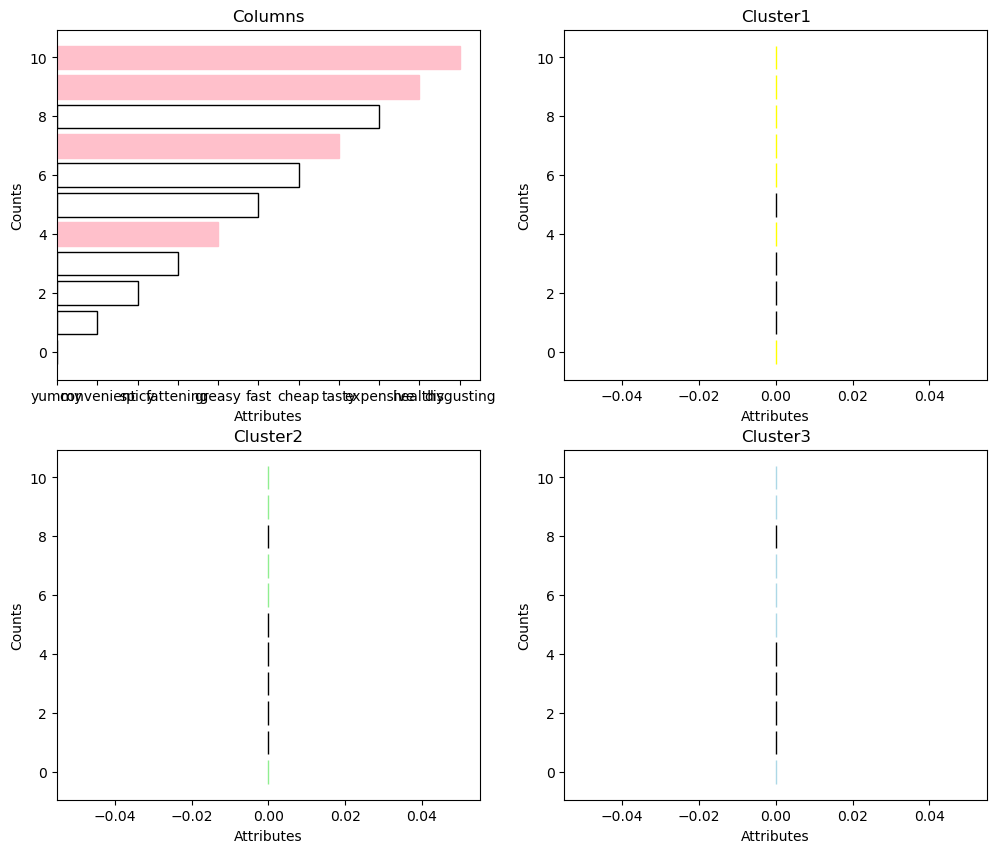

In [28]:

import matplotlib.pyplot as plt

# Assuming you have defined profile_plot_data, cluster_list, and cluster_dict earlier in your code

plt.figure(figsize=(12, 10))

try:
    for idx, cluster in enumerate(cluster_dict, 1):
        if idx == 1:
            k_range = [7, 4, 9, 10]
            color = "pink"
        elif idx == 2:
            k_range = [0, 4, 6, 7, 8, 9, 10]
            color = "yellow"
        elif idx == 3:
            k_range = [0, 6, 7, 9, 10]
            color = "lightgreen"
        else:
            k_range = [0, 5, 6, 7, 9, 10]
            color = "lightblue"

        plt.subplot(2, 2, idx)
        bars = plt.barh(profile_plot_data.index, profile_plot_data[cluster], edgecolor='black', facecolor='none')

        for i in range(len(bars)):
            if i in k_range:
                bars[i].set_color(color)

        plt.grid(False)
        plt.xlabel('Attributes')
        plt.ylabel('Counts')
        plt.title(cluster)

    plt.tight_layout()
    plt.show()
except:
    print("Completed")

In [29]:

# Load your data into a DataFrame
file_path = 'mcdonalds.csv'  # Adjust the file path accordingly
df = pd.read_csv(file_path)

# Display the first few rows of your DataFrame to ensure it's loaded correctly
print(df.head())

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming df is your original DataFrame
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the DataFrame
df_preprocessed = pd.DataFrame(pipeline.fit_transform(df))


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male  


In [30]:
df_ = pd.get_dummies(df , drop_first = True)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male  


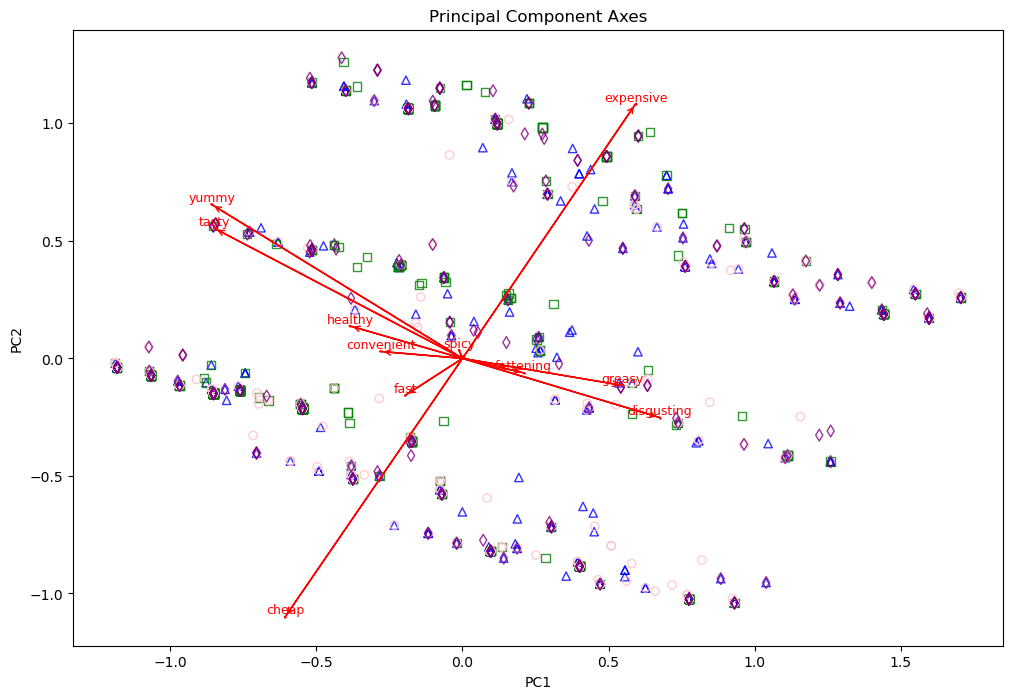

In [31]:
 # Adjust the file path accordingly
df = pd.read_csv(r"\Users\deept\Downloads\mcdonalds.csv")

# Display the first few rows of your DataFrame to ensure it's loaded correctly
print(df.head())
k4 = KMeans(n_clusters=4)
k4.fit(df_)
l4 = k4.predict(df_)

texts = []

markers = ['^', 's', 'o', 'd']

edge_colors = ['blue', 'green', 'pink', 'purple']

height = []
plt.figure(figsize=(12,8))
for i in range(4):
    temp = df_PCA[['yummy', 'convenient']][l4 == i]
    plt.scatter(temp['yummy'], temp['convenient'],label=i,edgecolor=edge_colors[i],marker=markers[i],alpha = 0.8,facecolor='none')

scale = 1.8

for i,j in enumerate(df_PCA.columns):
    text = plt.text(pca.components_[0, :][i]*scale,(pca.components_[1, :][i])*scale,j,color='red',fontsize=9,ha='center',va='bottom',stretch="expanded")
    texts.append(text)
    plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate('',xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale,s = 0.5,color='red')

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

In [33]:
df_.head()

,Age,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,cheap_Yes,tasty_Yes,expensive_Yes,...,Like_3,Like_4,Like_I hate it!-5,Like_I love it!+5,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
0,61,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,51,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,62,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,69,1,1,0,1,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
4,49,0,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


<Figure size 1200x800 with 0 Axes>

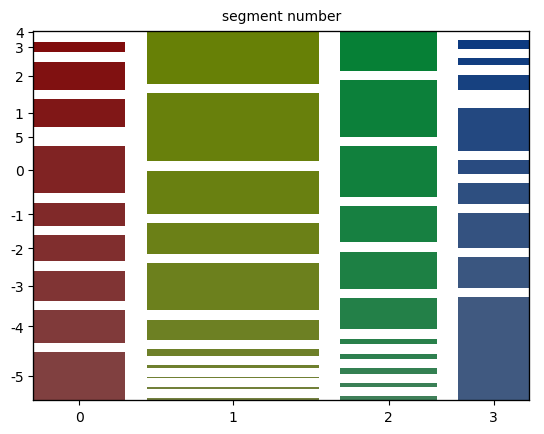

In [34]:
temp_col = df['Like'].replace({
    '+1':1,
    '+2':2,
    '+3':3,
    '+4':4,
    'I love it!+5':5,
    '0': 0,
    '-1': -1,
    '-2':-2,
    '-3':-3,
    '-4':-4,
    'I hate it!-5':-5
})

frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['like'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k: '')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

<Figure size 1200x800 with 0 Axes>

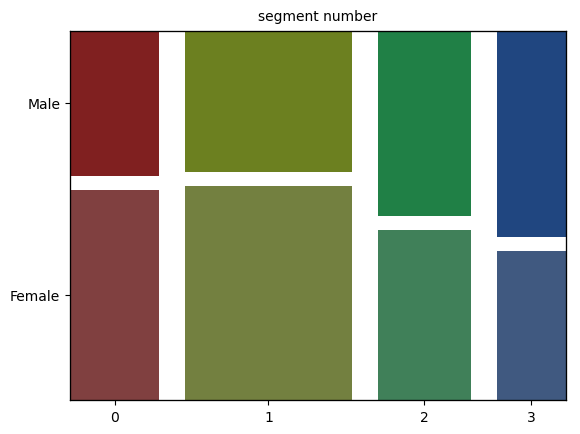

In [35]:
frame = pd.DataFrame({
    'segment': label4,
    'gender': df['Gender']
})

cross_tab = pd.crosstab(frame['segment'], frame['gender'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.06,labelizer = lambda k:'')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

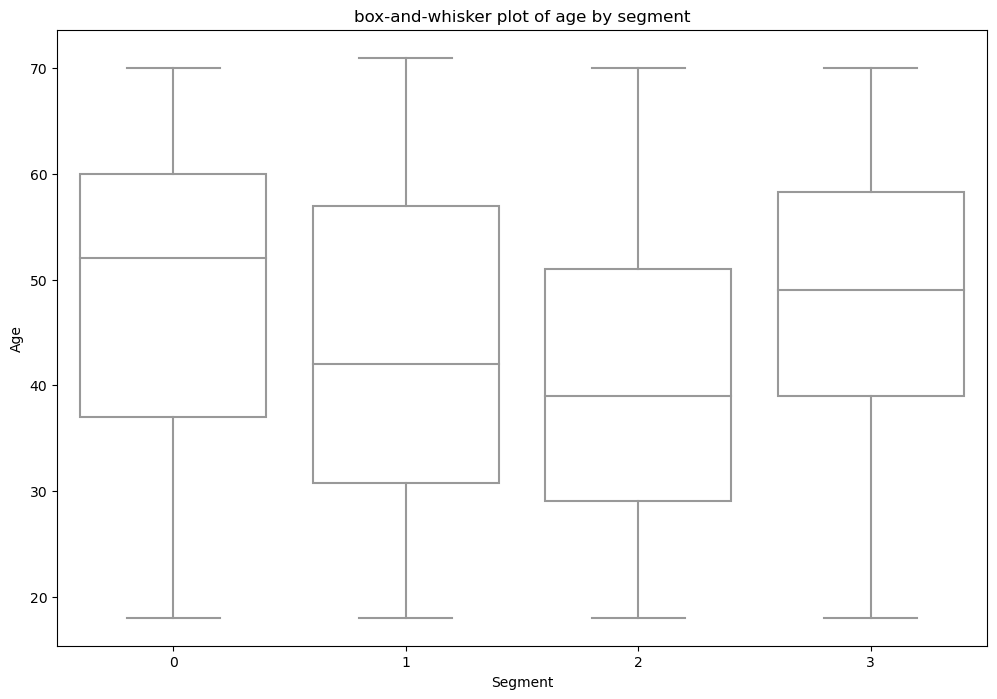

In [37]:
frame = pd.DataFrame({
    'segment': label4,
    'Age': df['Age']
})

plt.figure(figsize=(12, 8))
sns.boxplot(x='segment', y='Age', data=frame,color='white')

plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('box-and-whisker plot of age by segment')

plt.show()

In [40]:
frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col,
    'VisitFrequency': df['VisitFrequency'],
    'Gender': df['Gender']
})


visit_freq = {
    'Never': 1,
    'Once a year': 2,
    'Every three months': 3,
    'Once a month': 4,
    'More than once a week': 5,
    'Once a week': 6
}


frame['VisitFrequencyNumeric'] = frame['VisitFrequency'].map(visit_freq)
frame["GenderNumeric"] = np.where(df['Gender']=='Male',1,0)

visit = frame.groupby('segment')['VisitFrequencyNumeric'].mean()
#like = frame.groupby('segment')['like'].mean()
female = frame.groupby('segment')["GenderNumeric"].mean()

In [41]:
visit

segment
0    2.676375
1    4.122414
2    3.984568
3    2.450000
Name: VisitFrequencyNumeric, dtype: float64

In [42]:
female

segment
0    0.407767
1    0.398276
2    0.521605
3    0.579167
Name: GenderNumeric, dtype: float64

In [56]:
frame['like']  = frame['like'].astype('int32')

In [59]:
like = frame.groupby('segment')['like'].mean()

# plotting segment 

plt.figure(figsize=(12, 8))
plt.scatter(visit, like, s=female*8000,color='white',edgecolor="black")

for i, segment in enumerate(visit.index):
    plt.text(visit[segment], like[segment], str(i+1))

plt.xlim(2, 4.5)
plt.ylim(-3, 3)

plt.xlabel('Visit')
plt.ylabel('Like')

plt.show()